In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os

In [2]:
final_df=pd.read_csv("final.csv")
final_df.head()

,Race_id,Date,Race_no,config,surface,Distance,Surface_condition,horse_ratings,Prize,race_class_x,...,race_id_y,race_class_y,track_condition,Race_name,Track,horse_number,Horse_name,Horse_id,Jockey,Trainer
0,4547,2014-09-14,1,A,0,1400,GOOD TO FIRM,40-15,575000.0,5,...,2014-001,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",1,DOUBLE DRAGON,K019,B Prebble,D Cruz
1,4547,2014-09-14,1,A,0,1400,GOOD TO FIRM,40-15,575000.0,5,...,2014-001,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",2,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris
2,4547,2014-09-14,1,A,0,1400,GOOD TO FIRM,40-15,575000.0,5,...,2014-001,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",3,SUPREME PROFIT,P230,J Moreira,C S Shum
3,4547,2014-09-14,1,A,0,1400,GOOD TO FIRM,40-15,575000.0,5,...,2014-001,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",4,COOL PAL,S035,H W Lai,L Ho
4,4547,2014-09-14,1,A,0,1400,GOOD TO FIRM,40-15,575000.0,5,...,2014-001,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",5,AMAZING GIFT,S090,K C Leung,P O'Sullivan


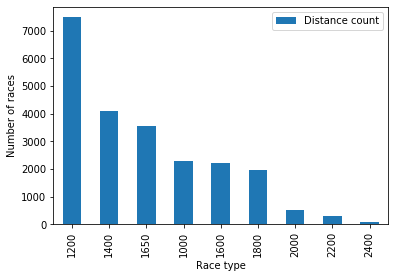

In [3]:
#Make the analisys for the race of 1200 m 
race_df=pd.DataFrame({"Distance count":final_df["Distance"].value_counts()})
race_df.plot(kind='bar')
plt.xlabel("Race type")
plt.ylabel("Number of races")
plt.show()


In [4]:
final_df.columns

Index(['Race_id', 'Date', 'Race_no', 'config', 'surface', 'Distance',
       'Surface_condition', 'horse_ratings', 'Prize', 'race_class_x',
       'Horse_no', 'horse_id_x', 'Final_position', 'Won', 'lengths_behind',
       'Horse_age', 'Horse_country', 'Horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'Actual_weight', 'draw', 'Finish_time',
       'win_odds', 'place_odds', 'race_date', 'Course', 'race_number',
       'race_id_y', 'race_class_y', 'track_condition', 'Race_name', 'Track',
       'horse_number', 'Horse_name', 'Horse_id', 'Jockey', 'Trainer'],
      dtype='object')

In [5]:
#Only filter the data for the race of 1200 
race_1200_df=final_df.loc[final_df["Distance"] == 1200]
race_1200_df = race_1200_df[['Won','Jockey','race_class_y','Surface_condition','Horse_name','Trainer']]
race_1200_df['Won'] = race_1200_df['Won'].astype('int64')

print(race_1200_df.dtypes)
race_1200_df.head()

Won                   int64
Jockey               object
race_class_y         object
Surface_condition    object
Horse_name           object
Trainer              object
dtype: object


,Won,Jockey,race_class_y,Surface_condition,Horse_name,Trainer
13,0,T H So,Class 5,GOOD TO FIRM,ALLEY-OOP,C W Chang
14,0,Z Purton,Class 5,GOOD TO FIRM,SPARKLING SWORD,K W Lui
15,0,M Chadwick,Class 5,GOOD TO FIRM,CALIFORNIA ROCK,A S Cruz
16,0,Y T Cheng,Class 5,GOOD TO FIRM,MONEY CAFE,C H Yip
17,0,O Doleuze,Class 5,GOOD TO FIRM,JOYFUL LUCK,C W Chang


In [42]:
race_1200_df["race_class_y"] = race_1200_df["race_class_y"].replace({"Class 4 (Restricted)":"Class 4","Class 4 (Special Condition)":"Class 4","Group One":"Group One and Two","Group Two":"Group One and Two","Hong Kong Group Two":"Hong Kong Group","Hong Kong Group One":"Hong Kong Group","Hong Kong Group Three":"Hong Kong Group"})
print( race_1200_df["race_class_y"].value_counts())

Class 4              3016
Class 3              2664
Class 5               771
Class 2               659
Class 1               131
Group One and Two     101
Hong Kong Group        89
Griffin Race           53
Name: race_class_y, dtype: int64


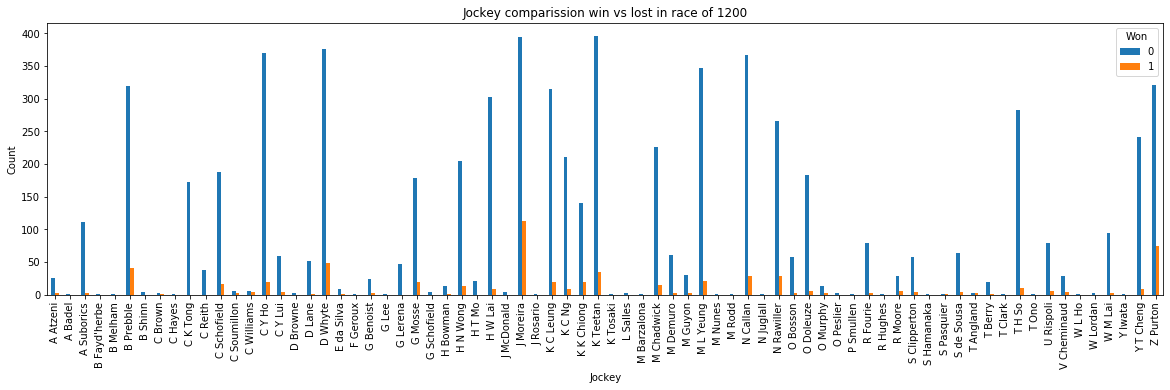

In [43]:
#Create a graph to look the jockey wins
#Jockey maybe is not the best variable to make the analisys 
pd.crosstab(race_1200_df["Jockey"],race_1200_df["Won"]).plot(kind='bar',figsize=(20,5))
plt.title("Jockey comparission win vs lost in race of 1200")
plt.xlabel("Jockey")
plt.ylabel("Count")
plt.show()

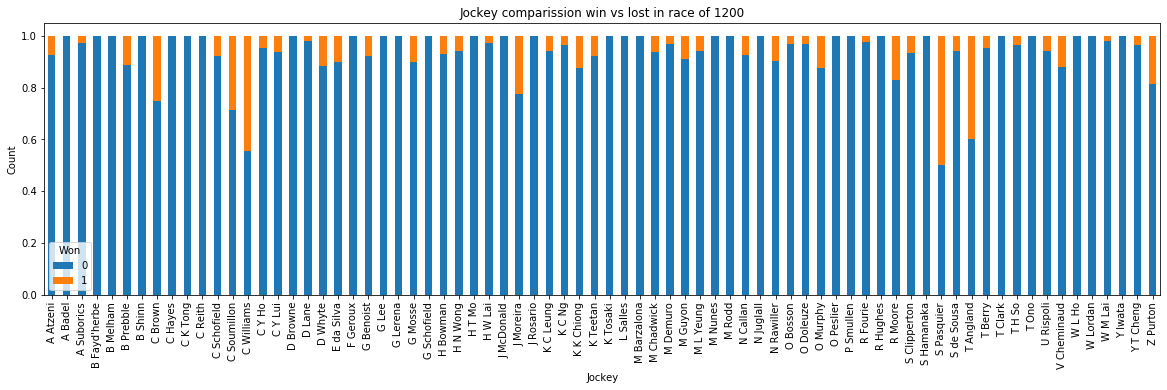

In [44]:
#Percentage of wons by jockey 
percentage_won=pd.crosstab(race_1200_df["Jockey"],race_1200_df["Won"])
percentage_won.div(percentage_won.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title("Jockey comparission win vs lost in race of 1200")
plt.xlabel("Jockey")
plt.ylabel("Count")
plt.show()

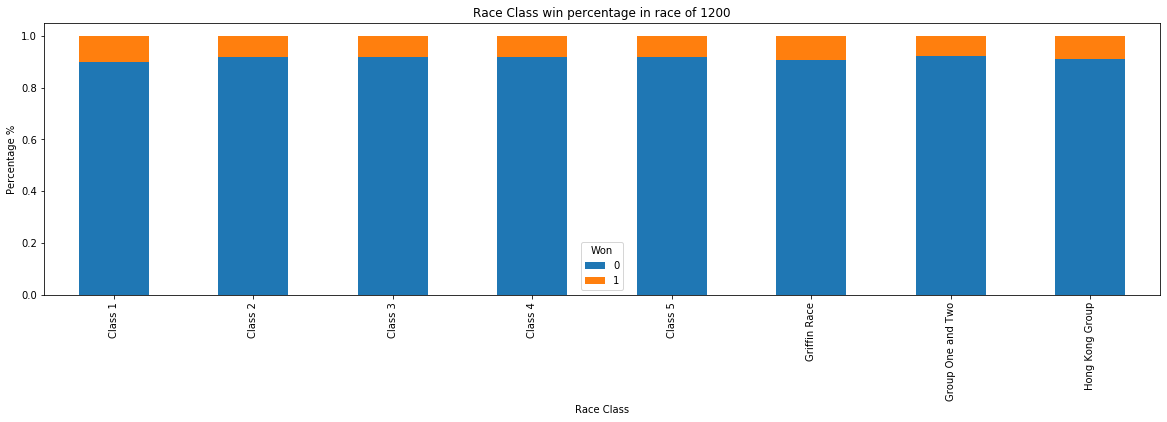

In [45]:
#Race Class percentage of wins is not a variable that defines the race winner
percentage_won=pd.crosstab(race_1200_df["race_class_y"],race_1200_df["Won"])
percentage_won.div(percentage_won.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title("Race Class win percentage in race of 1200")
plt.xlabel("Race Class")
plt.ylabel("Percentage %")
plt.show()

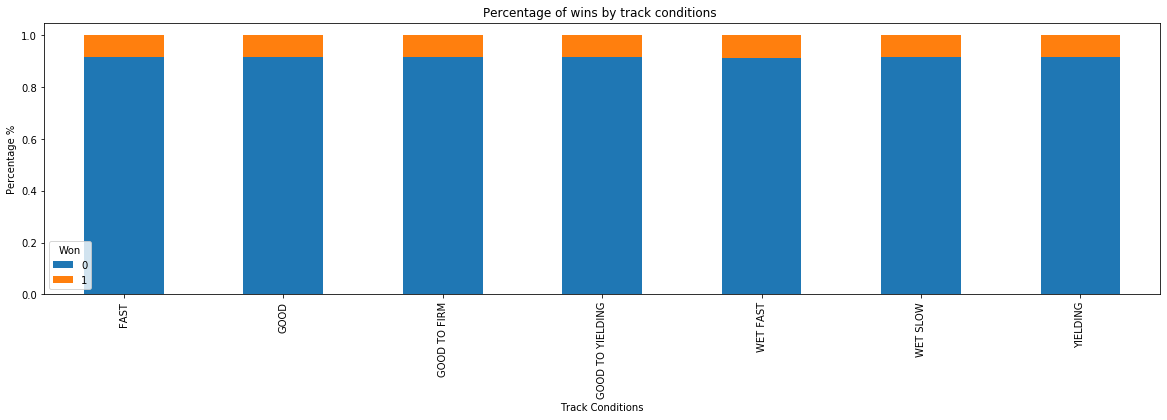

In [46]:
percentage_won=pd.crosstab(race_1200_df["Surface_condition"],race_1200_df["Won"])
percentage_won.div(percentage_won.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(20,5))
plt.title("Percentage of wins by track conditions ")
plt.xlabel("Track Conditions")
plt.ylabel("Percentage %")
plt.show()


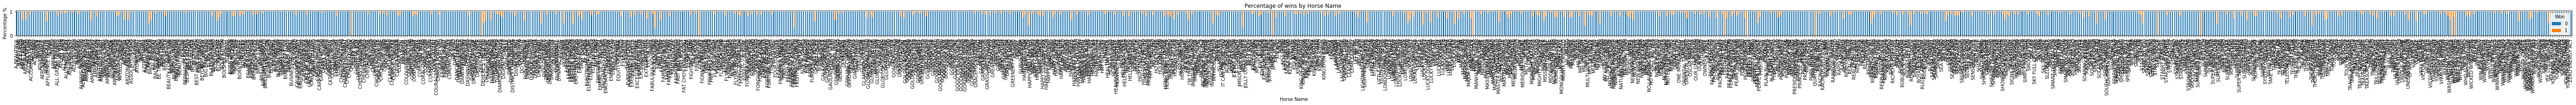

In [47]:
percentage_won=pd.crosstab(race_1200_df["Horse_name"],race_1200_df["Won"])
percentage_won.div(percentage_won.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(100,1))
plt.title("Percentage of wins by Horse Name ")
plt.xlabel("Horse Name")
plt.ylabel("Percentage %")
plt.show()

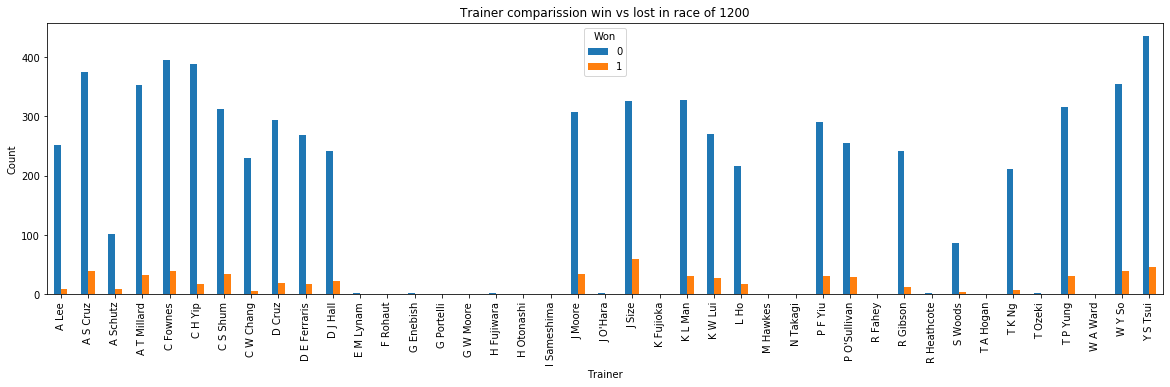

In [124]:
#Trainer is a clear out put
pd.crosstab(race_1200_df["Trainer"],race_1200_df["Won"]).plot(kind='bar',figsize=(20,5))
plt.title("Trainer comparission win vs lost in race of 1200")
plt.xlabel("Trainer")
plt.ylabel("Count")
plt.show()


In [97]:

s = race_1200_df
a = pd.get_dummies(s["race_class_y"],prefix="race_class_y")
b = pd.get_dummies(s["Surface_condition"],prefix="Surface_condition")
c = pd.get_dummies(s["Horse_name"],prefix="Horse_name")
d = pd.get_dummies(s["Trainer"],prefix="Trainer")
e = pd.get_dummies(s["Jockey"],prefix="Jockey")

In [112]:
binary_table = s.join(e)
#binary_table = binary_table.join(b)
#binary_table = binary_table.join(c)
binary_table = binary_table.join(d)
#binary_table = binary_table.join(a)


In [113]:
data_vars=binary_table.columns.values.tolist()
cat_vars=['race_class_y','Surface_condition','Horse_name','Trainer','Jockey']
to_keep=[i for i in data_vars if i not in cat_vars]
binary_table = binary_table[to_keep]

In [114]:
binary_table.to_csv("binary_table.csv",index = False)

In [115]:
binary_table.head(3)

,Won,Jockey_A Atzeni,Jockey_A Badel,Jockey_A Suborics,Jockey_B Fayd'herbe,Jockey_B Melham,Jockey_B Prebble,Jockey_B Shinn,Jockey_C Brown,Jockey_C Hayes,...,Trainer_R Gibson,Trainer_R Heathcote,Trainer_S Woods,Trainer_T A Hogan,Trainer_T K Ng,Trainer_T Ozeki,Trainer_T P Yung,Trainer_W A Ward,Trainer_W Y So,Trainer_Y S Tsui
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#Set the independant variables
X = binary_table.loc[:, binary_table.columns != 'Won']
#Set the dependant variables
y = binary_table.loc[:, binary_table.columns == 'Won']


In [117]:
#This algo will take a sample of the data

import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['Won'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no winners in oversampled data",len(os_data_y[os_data_y['Won']==0]))
print("Number of Winners",len(os_data_y[os_data_y['Won']==1]))
print("Proportion of no winners data in oversampled data is ",len(os_data_y[os_data_y['Won']==0])/len(os_data_X))
print("Proportion of winners data in oversampled data is ",len(os_data_y[os_data_y['Won']==1])/len(os_data_X))

length of oversampled data is  9634
Number of no winners in oversampled data 4817
Number of Winners 4817
Proportion of no winners data in oversampled data is  0.5
Proportion of winners data in oversampled data is  0.5


In [129]:
data_final_vars=binary_table.columns.values.tolist()
y=['Won']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False  True False  True  True False
 False  True False False False False  True False False False False  True
  True  True False False  True False  True  True False False False  True
 False False False False False False False False False False  True False
  True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False  True False  True False False False False False
 False False False False False False False]
[47 59 50 61 72  1 62  1 79  1  1  4 58  1  9 14 76 48  1 12 90 57 74  1
  1  1 17 19  1 30  1  1 84 11 52  1  6 88 69 66  3 49 20 21 86 92  1 93
  1 26 51 13 63 95 23 94  2 29 85  1 18 56 53 83 45 70 22 10 67 55 54 87
 33  1 39  7  8 35 27 46 24 43 42 40 38 73 96  1 80 75 64 77 68 36 65 32
 60 37 

In [142]:
best_var=pd.DataFrame({
    "X Values":X,
    "True or False":rfe.support_
                      })
best_var=best_var.loc[best_var["True or False"]==True]
best_var

,X Values,True or False
5,Jockey_B Prebble,True
7,Jockey_C Brown,True
9,Jockey_C K Tong,True
10,Jockey_C Reith,True
13,Jockey_C Williams,True
18,Jockey_D Whyte,True
23,Jockey_G Lerena,True
24,Jockey_G Mosse,True
25,Jockey_G Schofield,True
28,Jockey_H T Mo,True


In [155]:

cols=[]

best_var.iloc[19,0]

for x in range(len(best_var)-1):
    cols.append(best_var.iloc[x,0])
X=os_data_X[cols]
y=os_data_y["Won"]

In [168]:
#Calculate the Regression model 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
#Accuracy of the model 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65
